 # <center> MITgcm Channel </center> #

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline


In [3]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

# <center> Flat Bottom  </center> #

In [4]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

## $ROC_{iso} (y,z)$ ##

In [7]:
 c = utils.ChannelSetup(output_dir=str(x+'/3daynokpp/'))

In [73]:
PI[:,10][::-1]

array([ 0.38194713,  0.77342004,  0.90325761,  0.95116729,  0.96638793,
        0.97466147,  0.9838962 ,  0.98950666,  0.9929834 ,  0.99584413,
        0.99630487,  0.9968161 ,  0.99711931,  0.99738908,  0.99774206,
        0.99817133,  0.99836534,  0.99893463,  0.99980682,  0.99997348,
        0.99998993,  0.99999452,  0.9999972 ,  0.99999774,  0.99999809,
        0.99999881,  0.99999815,  0.99999994,  0.99999982,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.        ,  0.        ], dtype=float32)

In [67]:
th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2) # layer probability

In [76]:
np.cumsum(th[:,350][::-1])

array([  750.77313232,   811.60693359,   844.21569824,   869.63885498,
         891.09698486,   910.00384521,   927.23999023,   943.45050049,
         958.97003174,   974.01745605,   981.96929932,   990.21795654,
         998.04321289,  1005.84753418,  1013.65484619,  1021.84832764,
        1029.71459961,  1037.64648438,  1045.67382812,  1054.19006348,
        1062.45751953,  1070.89807129,  1079.5546875 ,  1088.9329834 ,
        1098.25085449,  1108.02429199,  1118.38720703,  1130.01281738,
        1141.99719238,  1155.03808594,  1169.49731445,  1187.05908203,
        1208.13867188,  1240.03515625,  1868.95703125,  2025.6262207 ,
        2111.18164062,  2198.63061523,  2389.13061523,  2984.99951172,
        2984.99951172,  2984.99951172], dtype=float32)

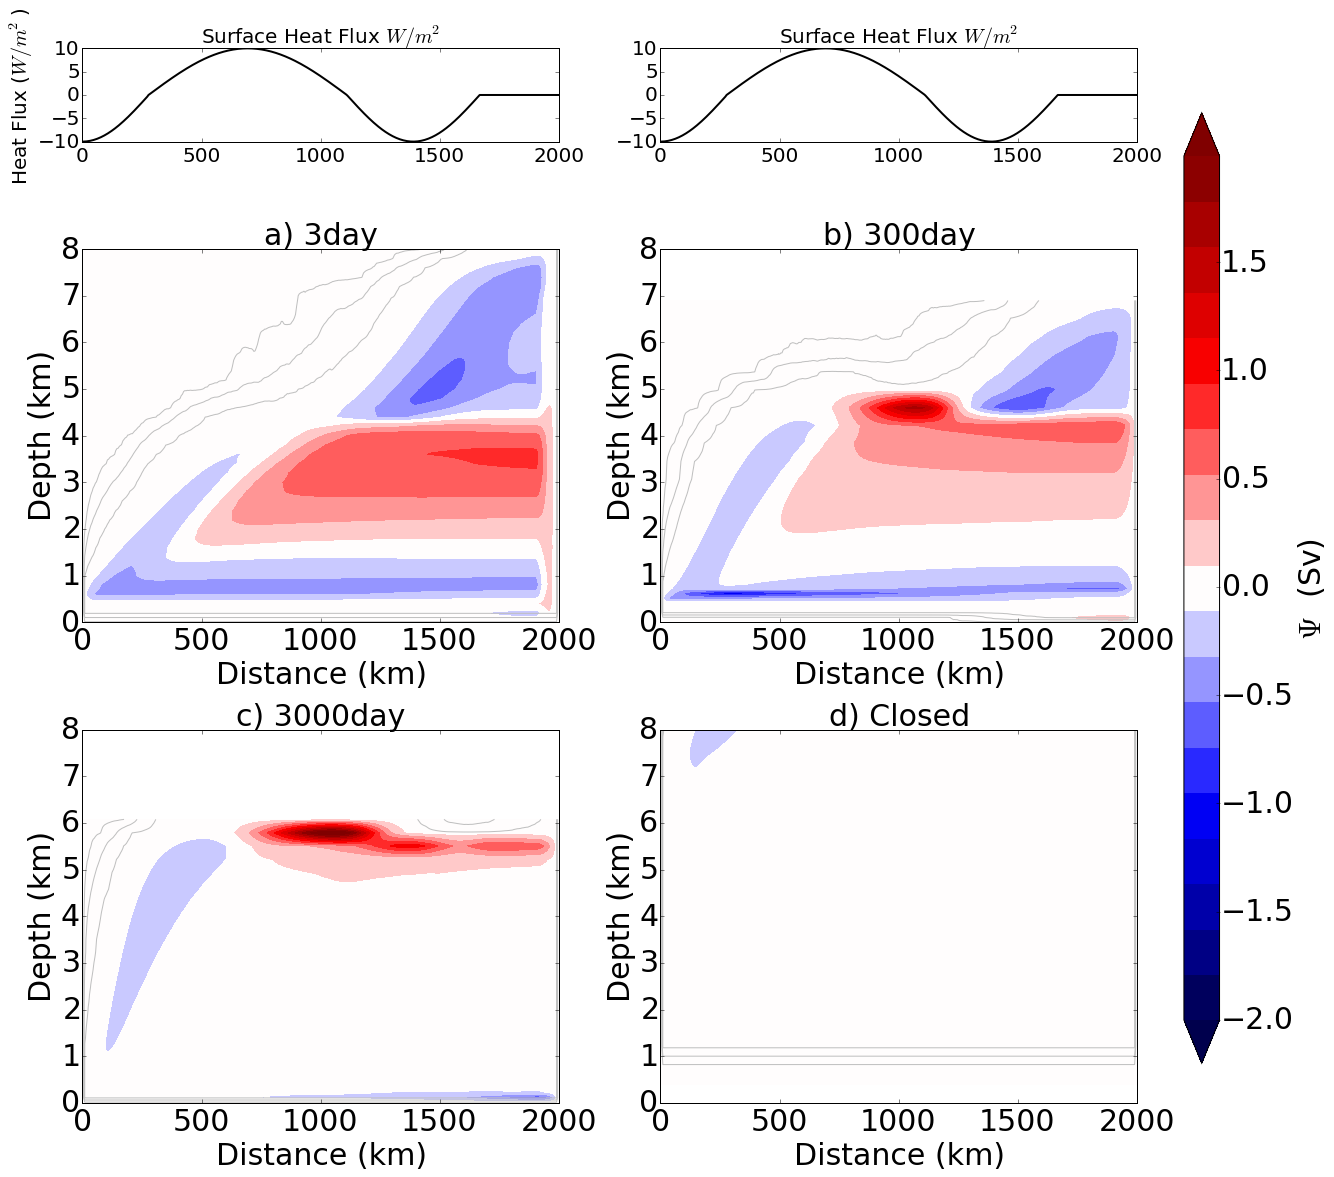

In [56]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2.2, .21)
Psi_ticks =np.arange(-2., 2., .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Ly = 2000e3
Lx = 1000e3
nx = np.round(Lx/5000)
ny = np.round(Ly/5000)
Q_0 = 10
Q = np.zeros_like(c.yc)
pi = math.pi
Q=np.zeros(np.shape(Q))
Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
gs = gridspec.GridSpec(4, 3, height_ratios=[1, 4, 4, 4])
ax = plt.subplot(gs[3])
ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
if Full == 'N':
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 4])
    ax = plt.subplot(gs[0])
    ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax = plt.subplot(gs[1])
    ax.plot(c.yc/1000,-Q,  color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(Runs)):
    #i=1
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    c.load_grid()
    Psi = c.get_psi_iso()/10**6
    Rho = np.genfromtxt(x+'/'+str(tau[Runs[i]])+'daynokpp/Temp', delimiter = ',')
    nolayers = len(Psi[:, 1])
    Rhop = np.genfromtxt(x+'/'+str(tau[Runs[i]])+'daynokpp/Temp', delimiter = ',')
    Rhop = Rho[0:-1]
    Rho = Rho[1::]  # The layers package bins a layer so adjust 
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2) # layer probability
    PImask = PI.mean < 0.05
    Psi = ma.masked_array(Psi,PImask)
    #Psi[Psi>=1.95]=1.95
    #ax = fig.add_subplot(2, 2, i+1)
    ax = plt.subplot(gs[2+i])
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yg/1000, Rho,
                Psi, Psi_levs, cmap=plt.cm.seismic, extend='both')
    ylim(0,8)
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    if str(tau[Runs[i]]) == 'Closed':
        tRef = [7.95797596, 7.81253554, 7.50931741, 6.93595077, 6.23538398,
                5.60148493, 5.02790935, 4.5089167 , 4.03931274, 3.6143975 ,
                3.22991829, 2.88202712, 2.56724216, 2.28241296, 2.02468884,
                1.79149041, 1.58048375, 1.38955702, 1.21679938, 1.0604818 ,
                0.9190398 , 0.79105779, 0.67525488, 0.57047207, 0.47566066,
                0.38987176, 0.31224674, 0.24200873, 0.14898305, 0.04478574]

    r = ax.contour(c.yg/1000,Rho,PI, [0.05, 0.5,.95],colors='0.75',linewidth=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

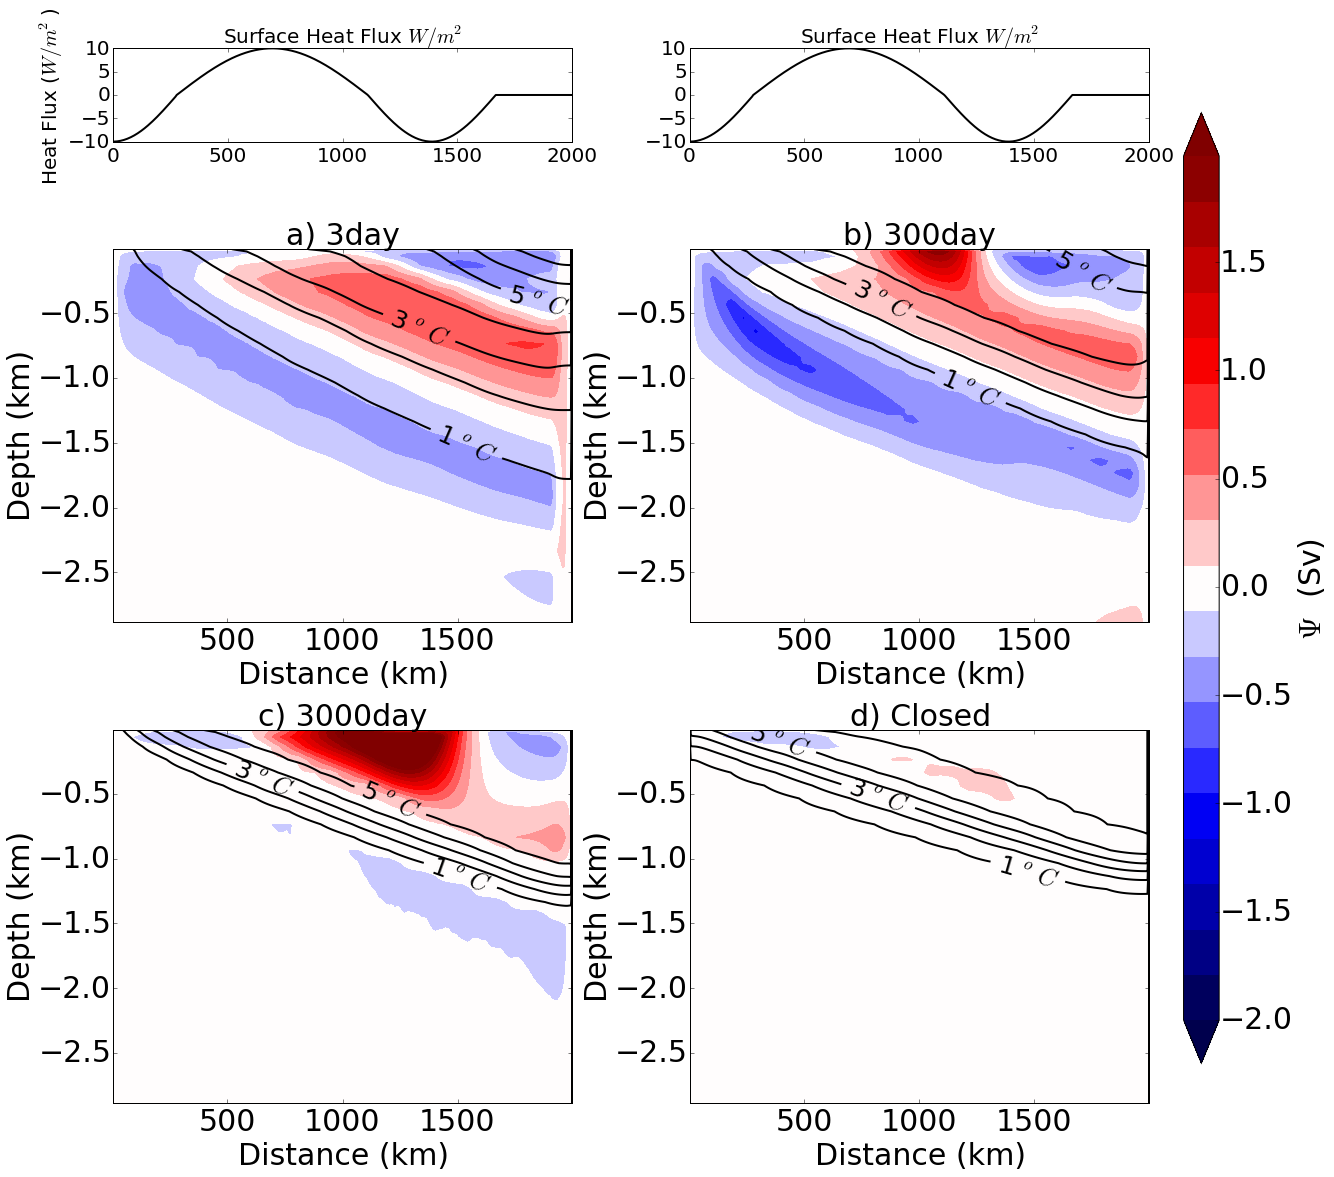

In [15]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2.2, .21)
Psi_ticks =np.arange(-2., 2., .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Ly = 2000e3
Lx = 1000e3
nx = np.round(Lx/5000)
ny = np.round(Ly/5000)
Q_0 = 10
Q = np.zeros_like(c.yc)
pi = math.pi
Q=np.zeros(np.shape(Q))
Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
gs = gridspec.GridSpec(4, 3, height_ratios=[1, 4, 4, 4])
ax = plt.subplot(gs[3])
ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
if Full == 'N':
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 4])
    ax = plt.subplot(gs[0])
    ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax = plt.subplot(gs[1])
    ax.plot(c.yc/1000,-Q,  color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(Runs)):
    #i=1
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    c.load_grid()
    Psi = c.get_psi_iso_z()/10**6
    #Psi[Psi>=1.95]=1.95
    #ax = fig.add_subplot(2, 2, i+1)
    ax = plt.subplot(gs[2+i])
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.seismic, extend='both')
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    if str(tau[Runs[i]]) == 'Closed':
        tRef = [7.95797596, 7.81253554, 7.50931741, 6.93595077, 6.23538398,
                5.60148493, 5.02790935, 4.5089167 , 4.03931274, 3.6143975 ,
                3.22991829, 2.88202712, 2.56724216, 2.28241296, 2.02468884,
                1.79149041, 1.58048375, 1.38955702, 1.21679938, 1.0604818 ,
                0.9190398 , 0.79105779, 0.67525488, 0.57047207, 0.47566066,
                0.38987176, 0.31224674, 0.24200873, 0.14898305, 0.04478574]
        Tavlat = np.apply_along_axis(np.divide, 0, Tavlat, 4-np.sum(tRef*c.dzf)/-c.zc[-1])
    q = ax.contour(c.yc/1000, c.zc/1000, Tavlat, Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

In [5]:
T1 = np.min(c.get_zonal_avg('Tav.nc','THETA')) - 0.1
T2 = np.max(c.get_zonal_avg('Tav.nc','THETA')) + 0.2
Tm = np.mean(c.get_zonal_avg('Tav.nc','THETA'))

In [18]:
np.round(np.linspace(np.round(T1,2), np.round(Tm+abs(Tm-T1),2),32),2)

array([-0.1 ,  0.  ,  0.1 ,  0.21,  0.31,  0.41,  0.51,  0.62,  0.72,
        0.82,  0.92,  1.02,  1.13,  1.23,  1.33,  1.43,  1.54,  1.64,
        1.74,  1.84,  1.95,  2.05,  2.15,  2.25,  2.35,  2.46,  2.56,
        2.66,  2.76,  2.87,  2.97,  3.07])

In [19]:
np.round(np.linspace(np.round(Tm+abs(Tm-T1),2),T2,11),2)

array([ 3.07,  3.45,  3.84,  4.22,  4.6 ,  4.98,  5.37,  5.75,  6.13,
        6.52,  6.9 ])

## MOC (y,z) ##

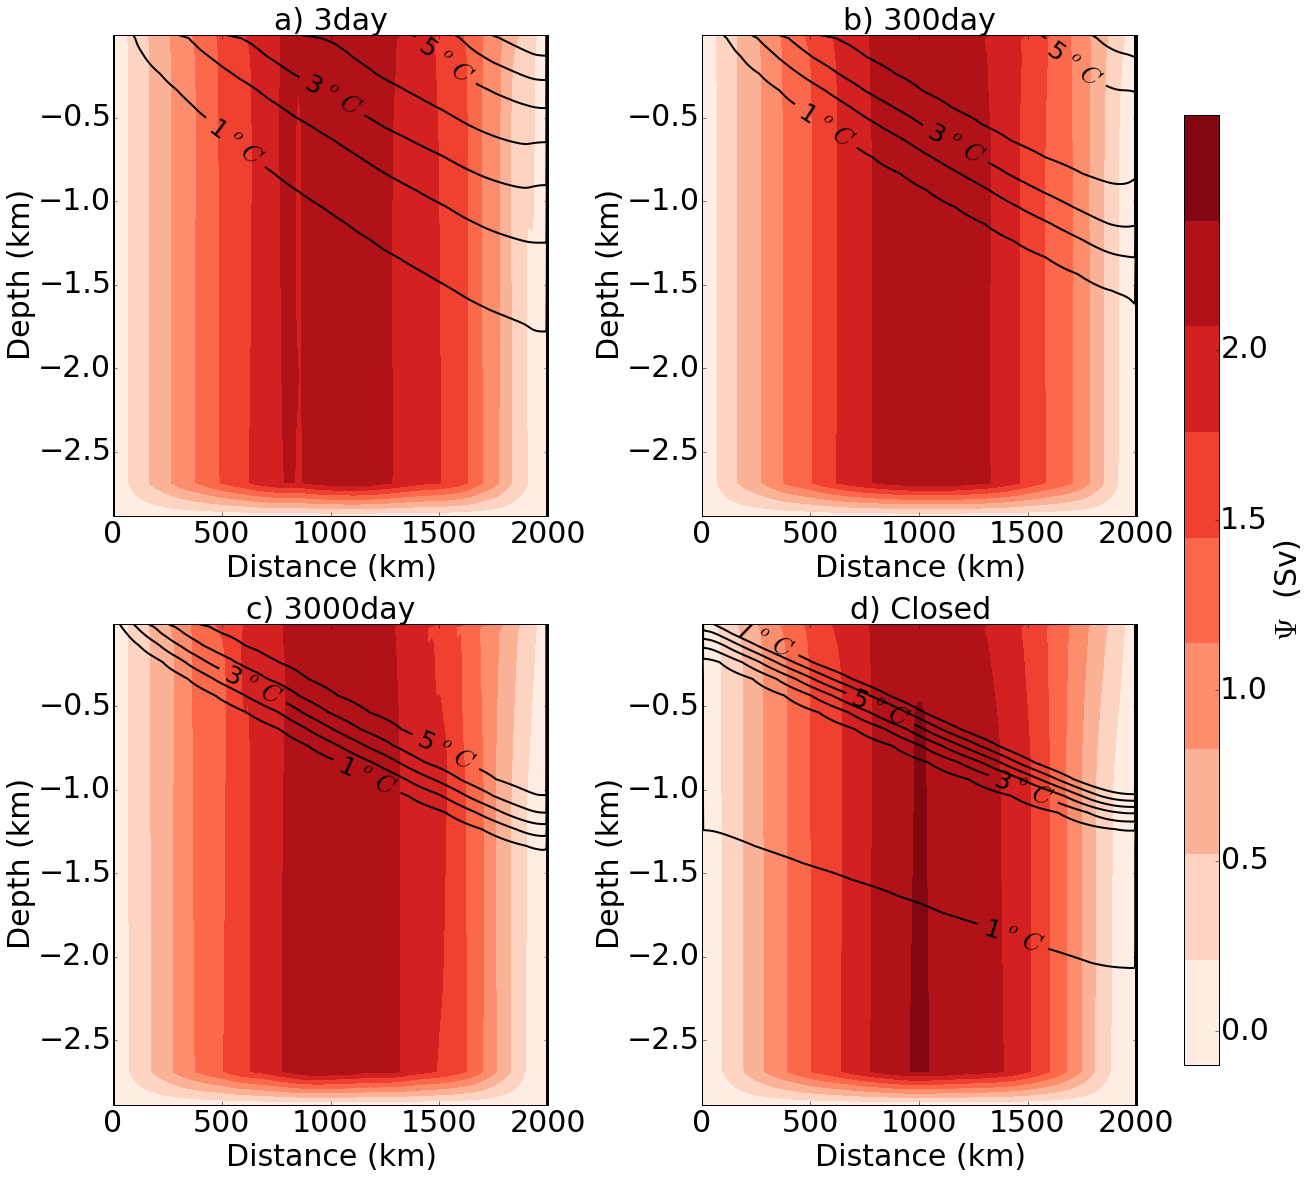

In [8]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.1, 2.7, .31)
Psi_ticks =np.arange(0, 2.5, .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    c.load_grid()
    Psi = c.get_psi_bar()/10**6
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yg/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.Reds)

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


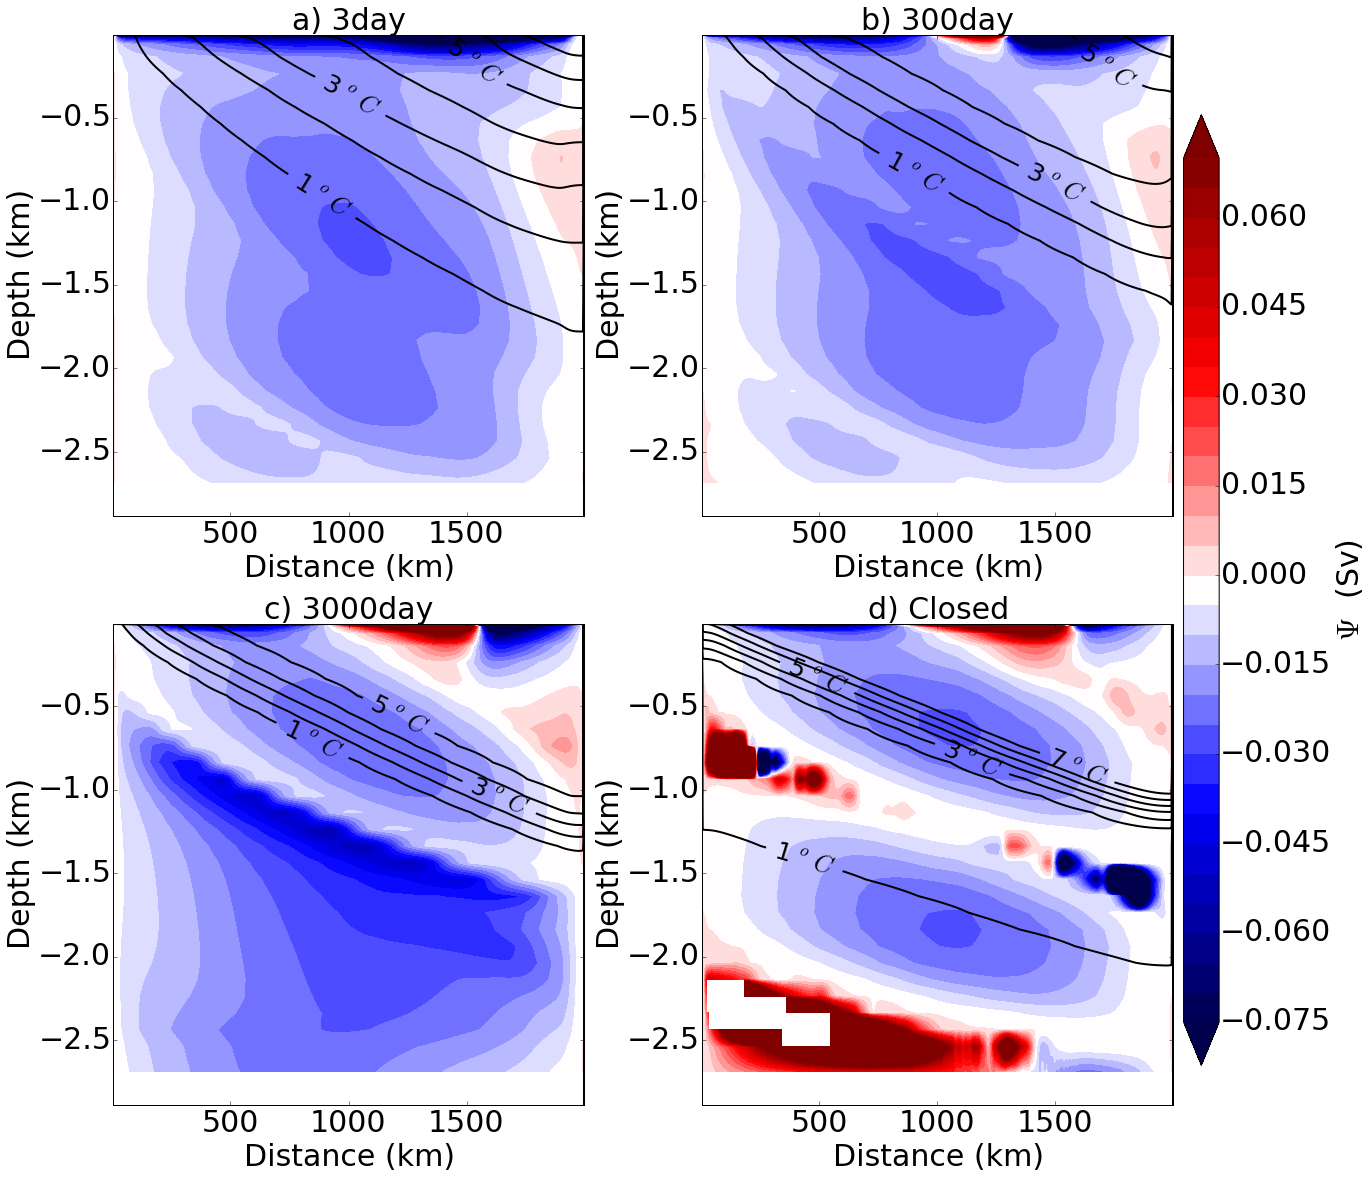

In [26]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-.075, .075, .005)
Psi_ticks =np.arange(0, 2.5, .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    Tw = c.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    Tv = c.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    VTbar = V*Tv
    VpTp = VT - VTbar
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol[0:-1,:,:]
    npad = ((0, 1), (0, 0), (0, 0))
    Tz = np.pad(Tz, pad_width=npad, mode='constant', constant_values=0)
    PsiEd = (CellVol*c.vgrid_to_cgrid(VpTp)/Tz).mean(axis=2)
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                -PsiEd, Psi_levs, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax )
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:45: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


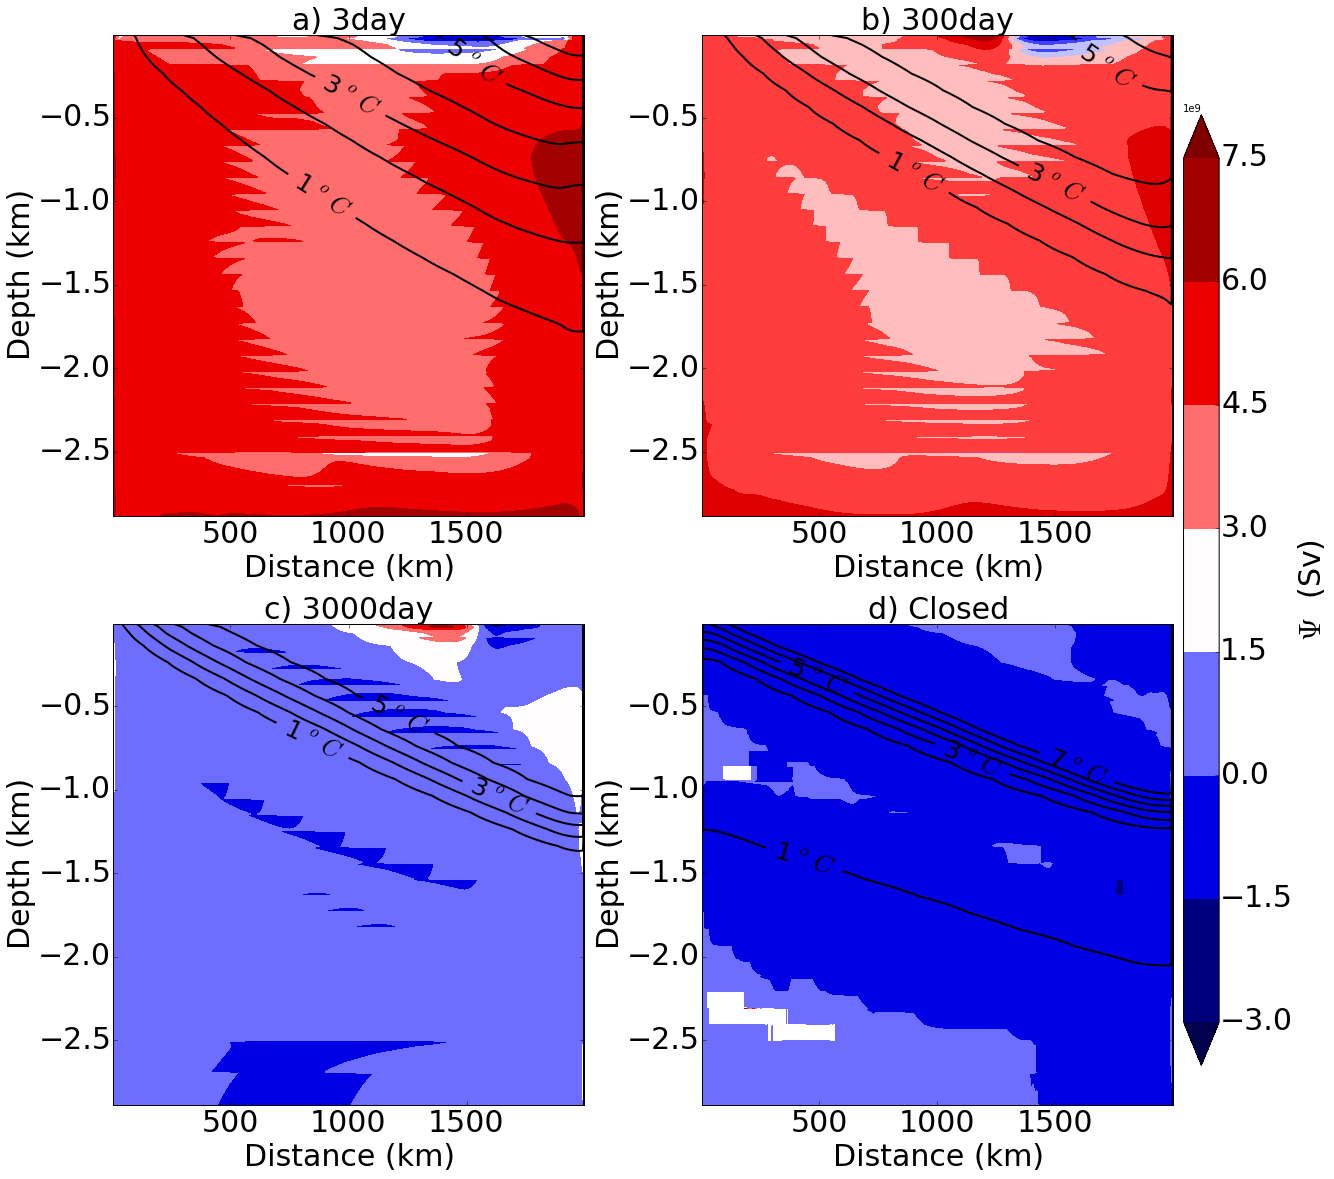

In [32]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-.075, .075, .005)
Psi_ticks =np.arange(0, 2.5, .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    Tw = c.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    Tv = c.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    VTbar = V*Tv
    VpTp = VT - VTbar
    ########################################################################
    # LAYERS STYLE ITERPOLATION
    FineGridFact = 20
    Nzff = 900
    ZFF = np.linspace(c.zc[0],c.zc[-1],900)
    ZFFp = np.linspace(c.zf[0],c.zf[-1],901)
    VTbarff = zeros((900,401,200))
    VpTpff = zeros((900,401,200))
    Tvff = zeros((900,401,200))
    Twff = zeros((901,400,200))
    for ii in range(c.Nx-1):
        for jj in range(c.Ny):
            VTbarff[:,jj,ii] = interp(ZFF, c.zc[::-1], VTbar[::-1,jj,ii])
            VpTpff[:,jj,ii] = interp(ZFF, c.zc[::-1], VpTp[::-1,jj,ii])
            Tvff[:,jj,ii] = interp(ZFF, c.zc[::-1], Tv[::-1,jj,ii])
    for ii in range(c.Nx-1):
        for jj in range(c.Ny-1):
            Twff[:,jj,ii] = interp(ZFFp, c.zf[::-1][0:-1], Tw[::-1,jj,ii])
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    CellVolff = c.rac*tile((ZFFp[0:-1]-ZFFp[1::]),(c.Nx,c.Ny,1)).T
    Tz = (Twff[1::,:,:] - Twff[0:-1,:,:])#*CellVolff[0:-1,:,:]
    
    #npad = ((0, 1), (0, 0), (0, 0))
    #Tz = np.pad(Tz, pad_width=npad, mode='constant', constant_values=0)
    PsiEd = np.nanmean((CellVolff*c.vgrid_to_cgrid(VpTpff)/Tz),axis=2)
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, ZFF/1000,
                -PsiEd, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax )
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

### A few extra plots... ####

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


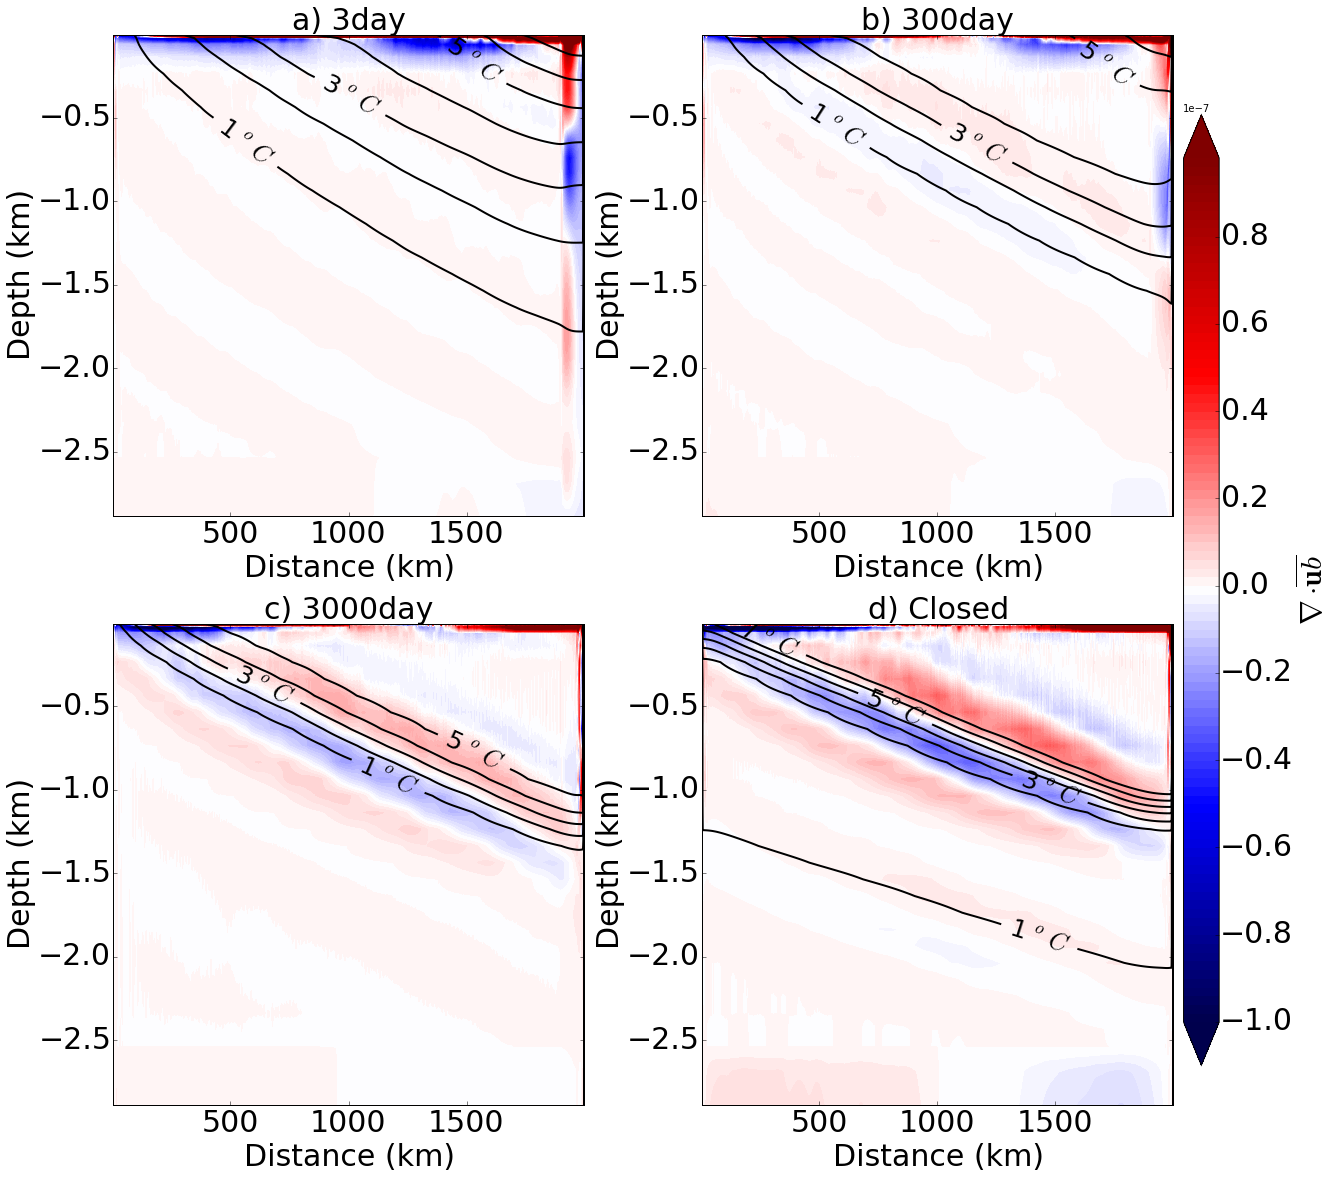

In [9]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (c.ddy_cgrid_centered(VT.mean(axis=2)) + c.ddz_cgrid_centered(WT.mean(axis=2))) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


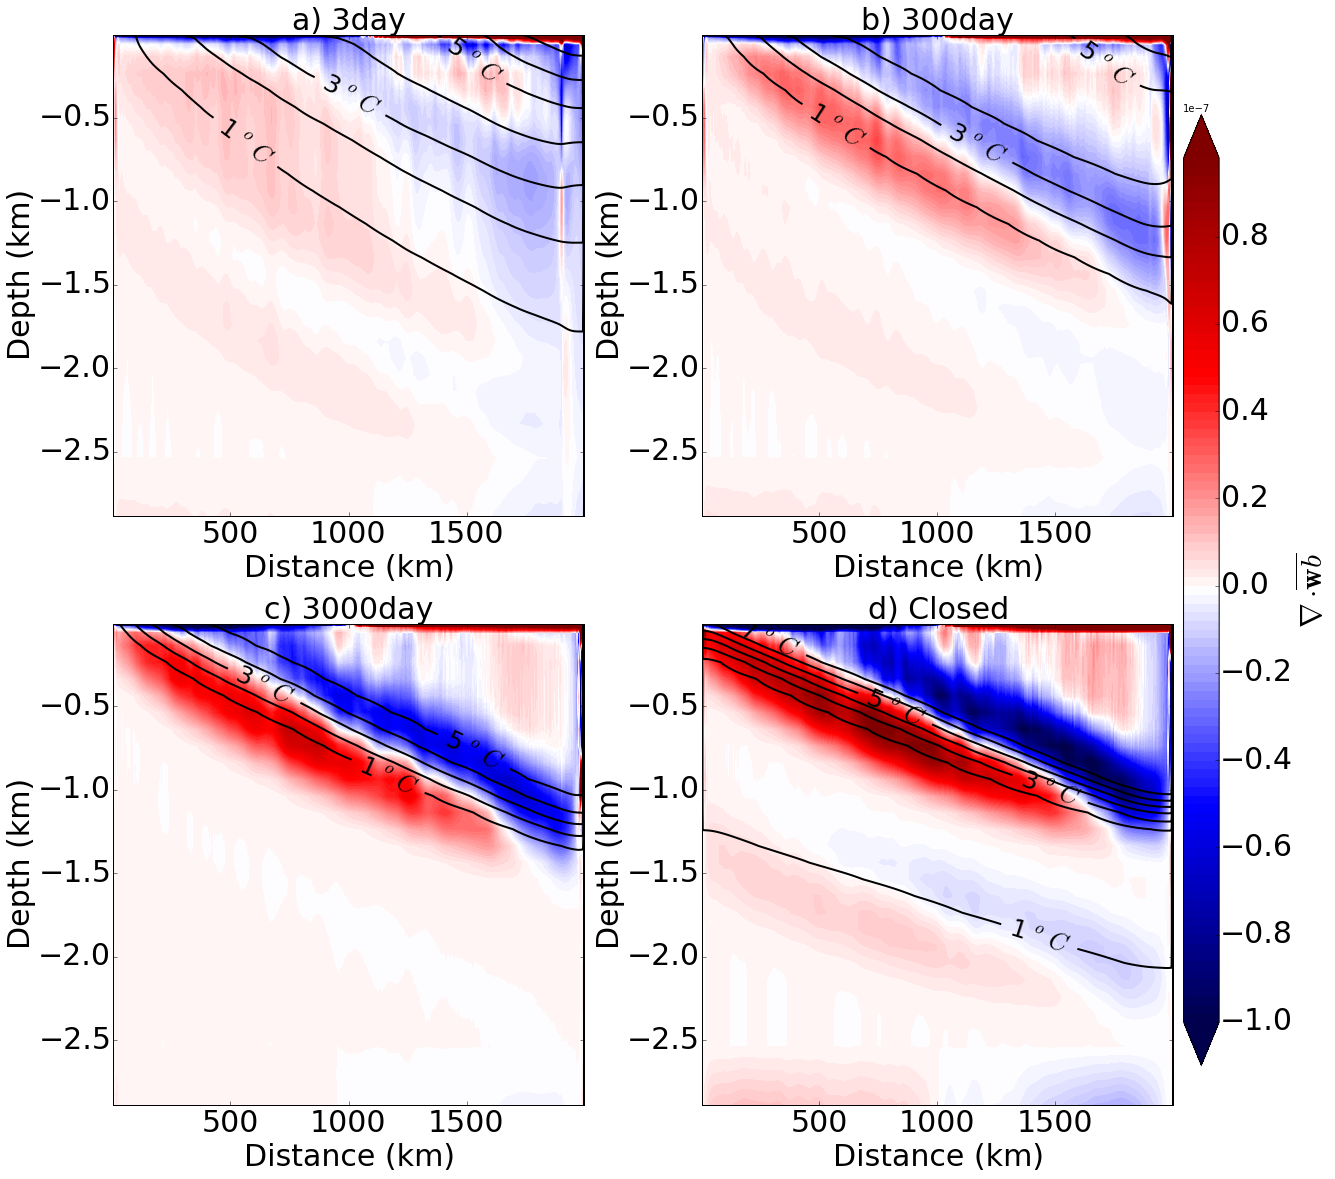

In [10]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               ( c.ddz_cgrid_centered(WT.mean(axis=2))) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{w} b}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


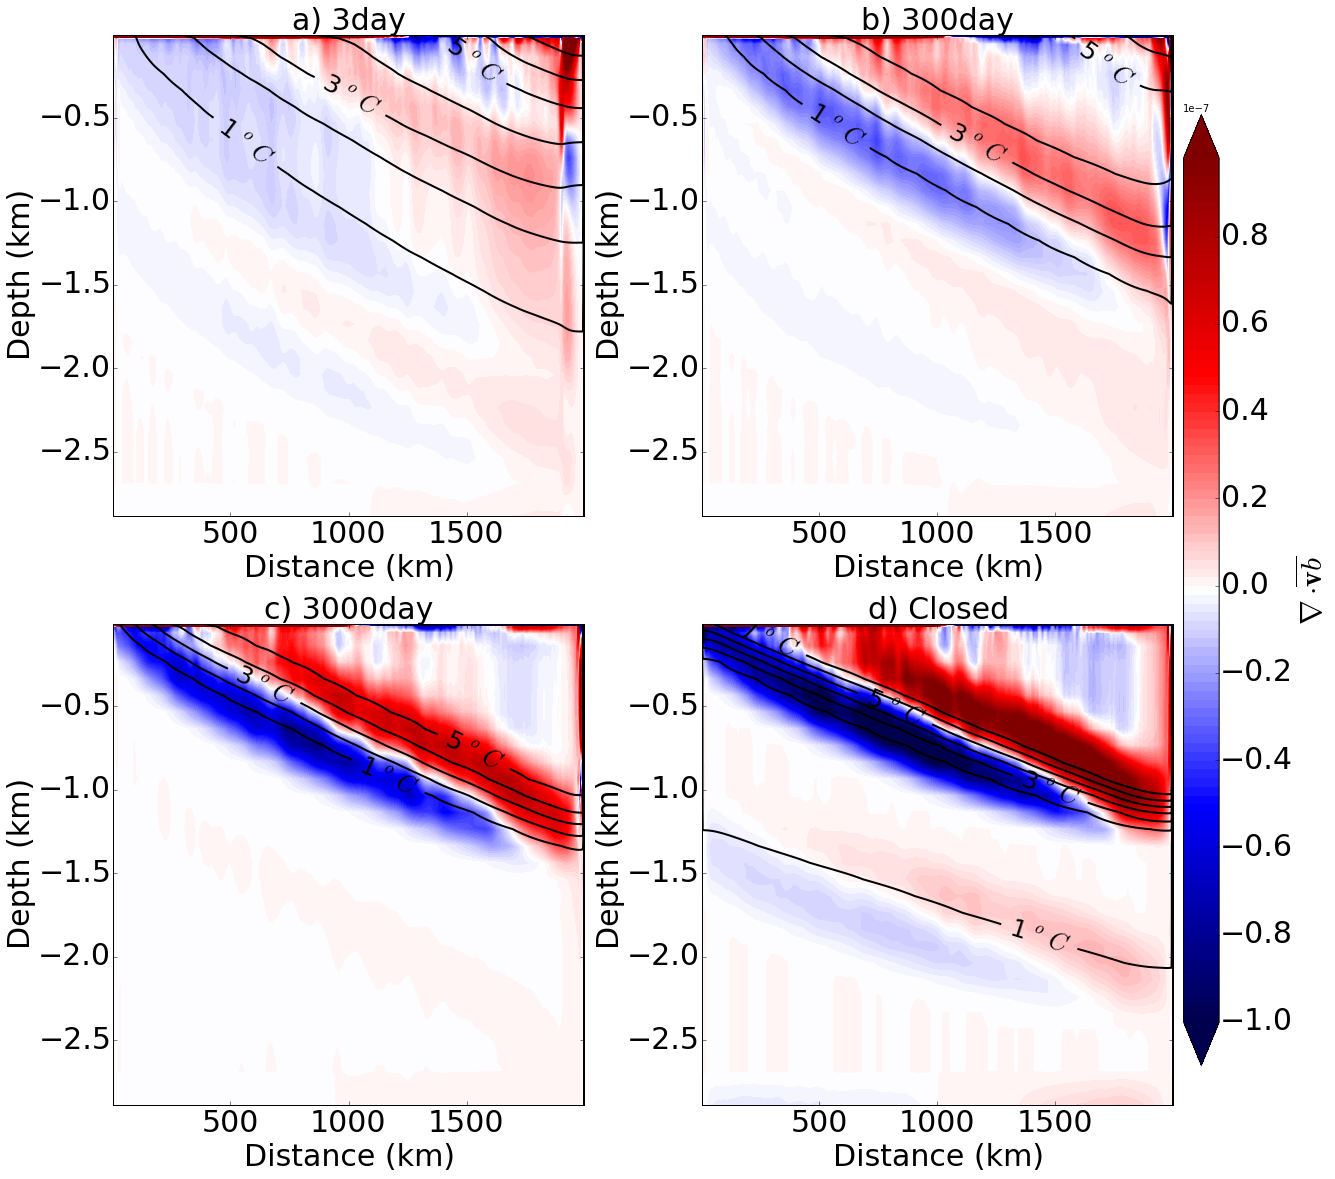

In [11]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (c.ddy_cgrid_centered(VT.mean(axis=2)) ) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{v} b}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


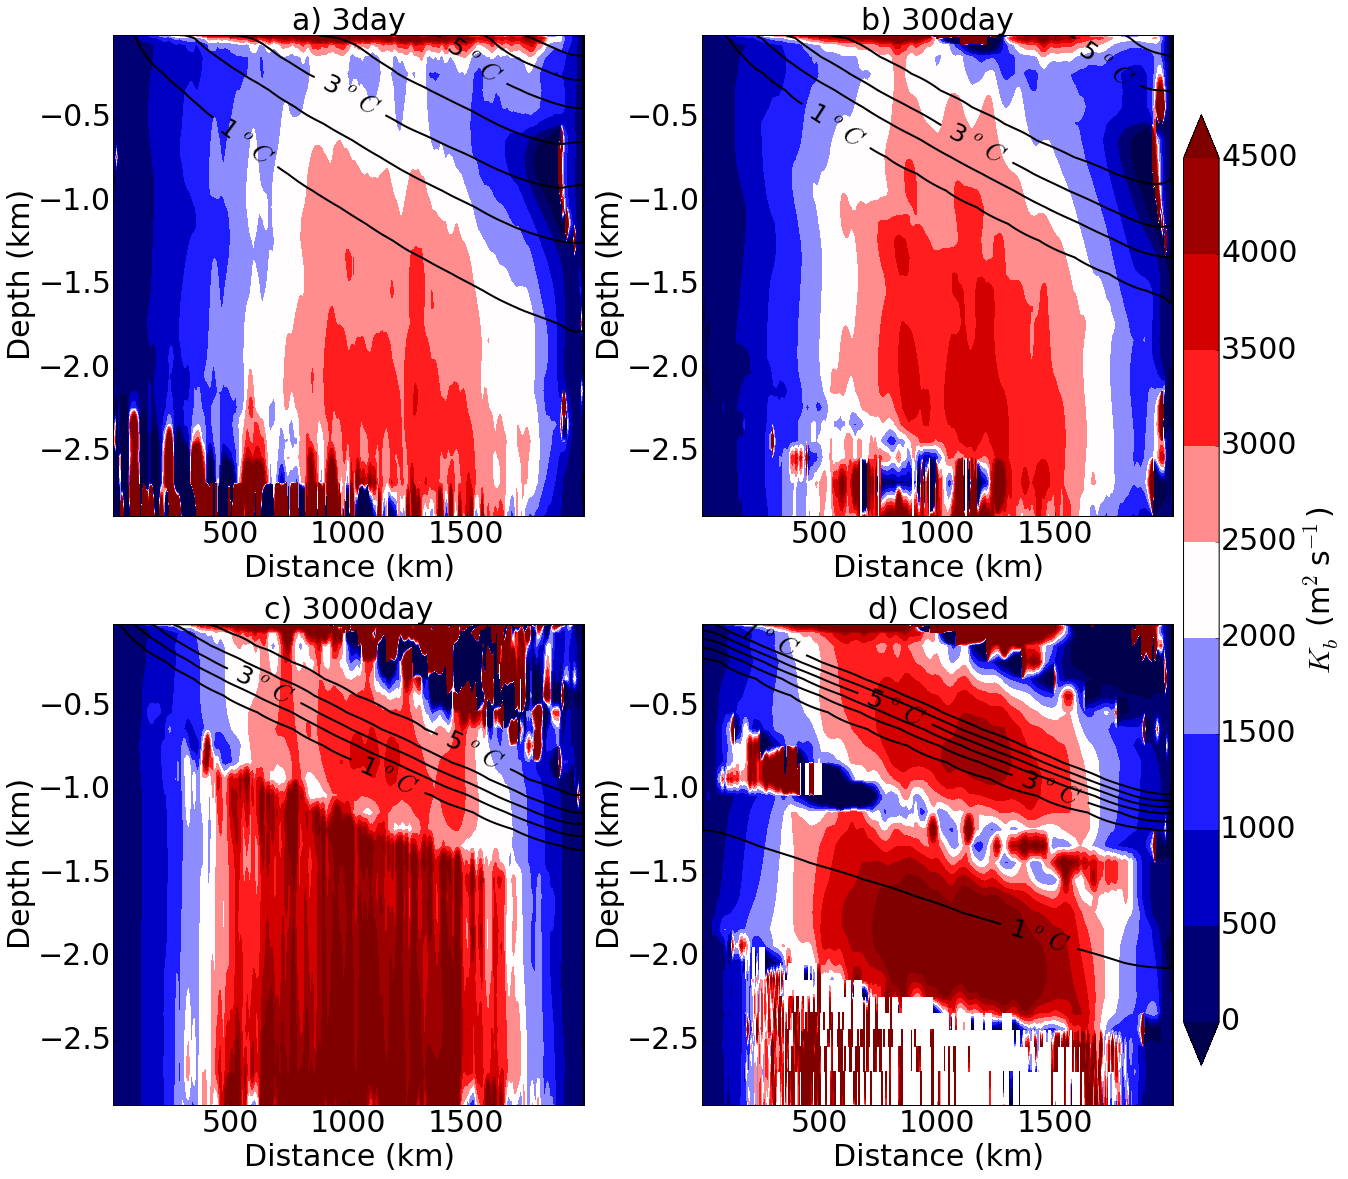

In [12]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-0,5000,500))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000, Kb , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


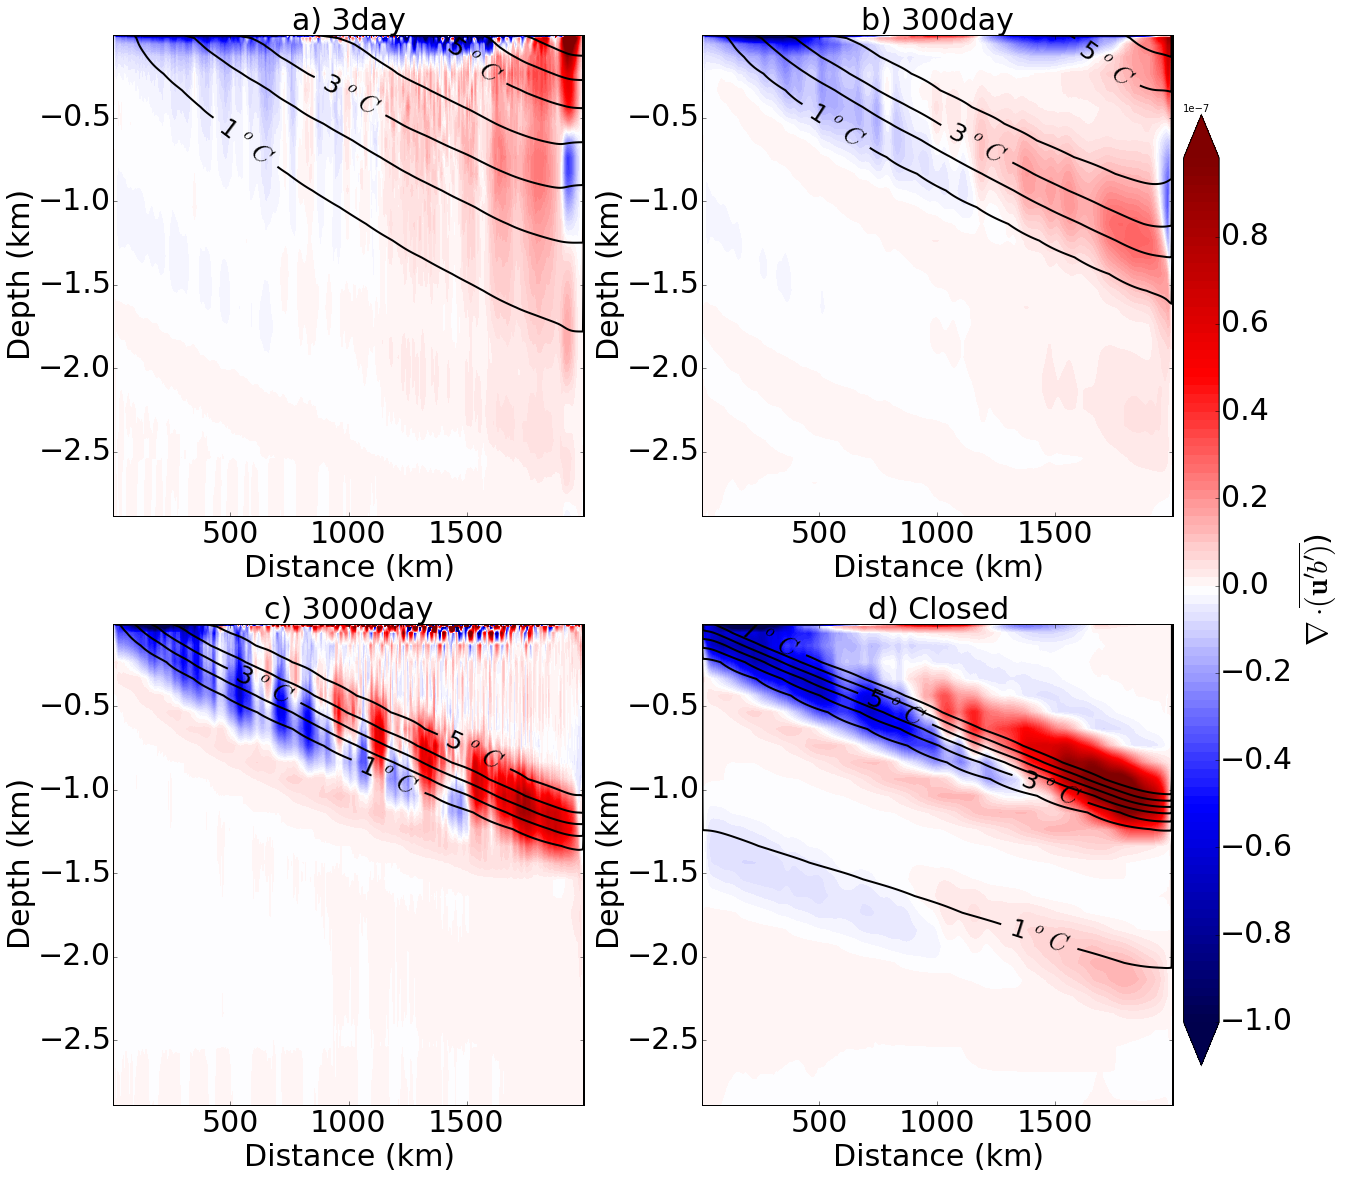

In [13]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddy_cgrid_centered(VpTp) + c.ddz_cgrid_centered(WpTp)), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


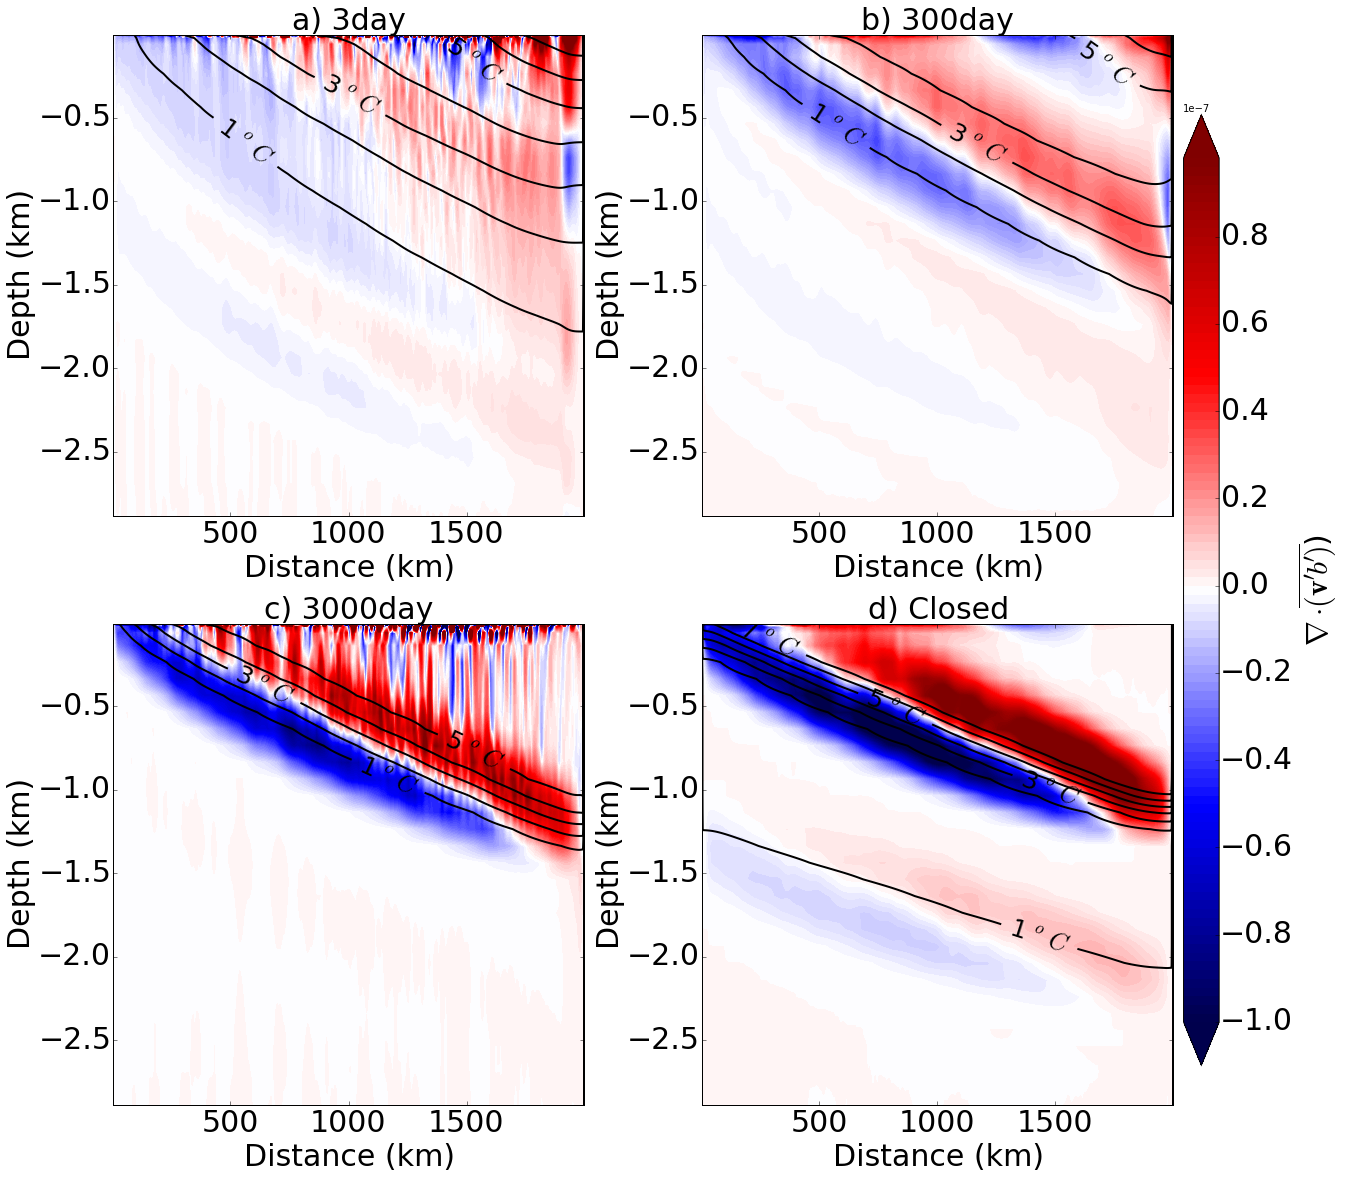

In [14]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddy_cgrid_centered(VpTp) ), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{v}' b')}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


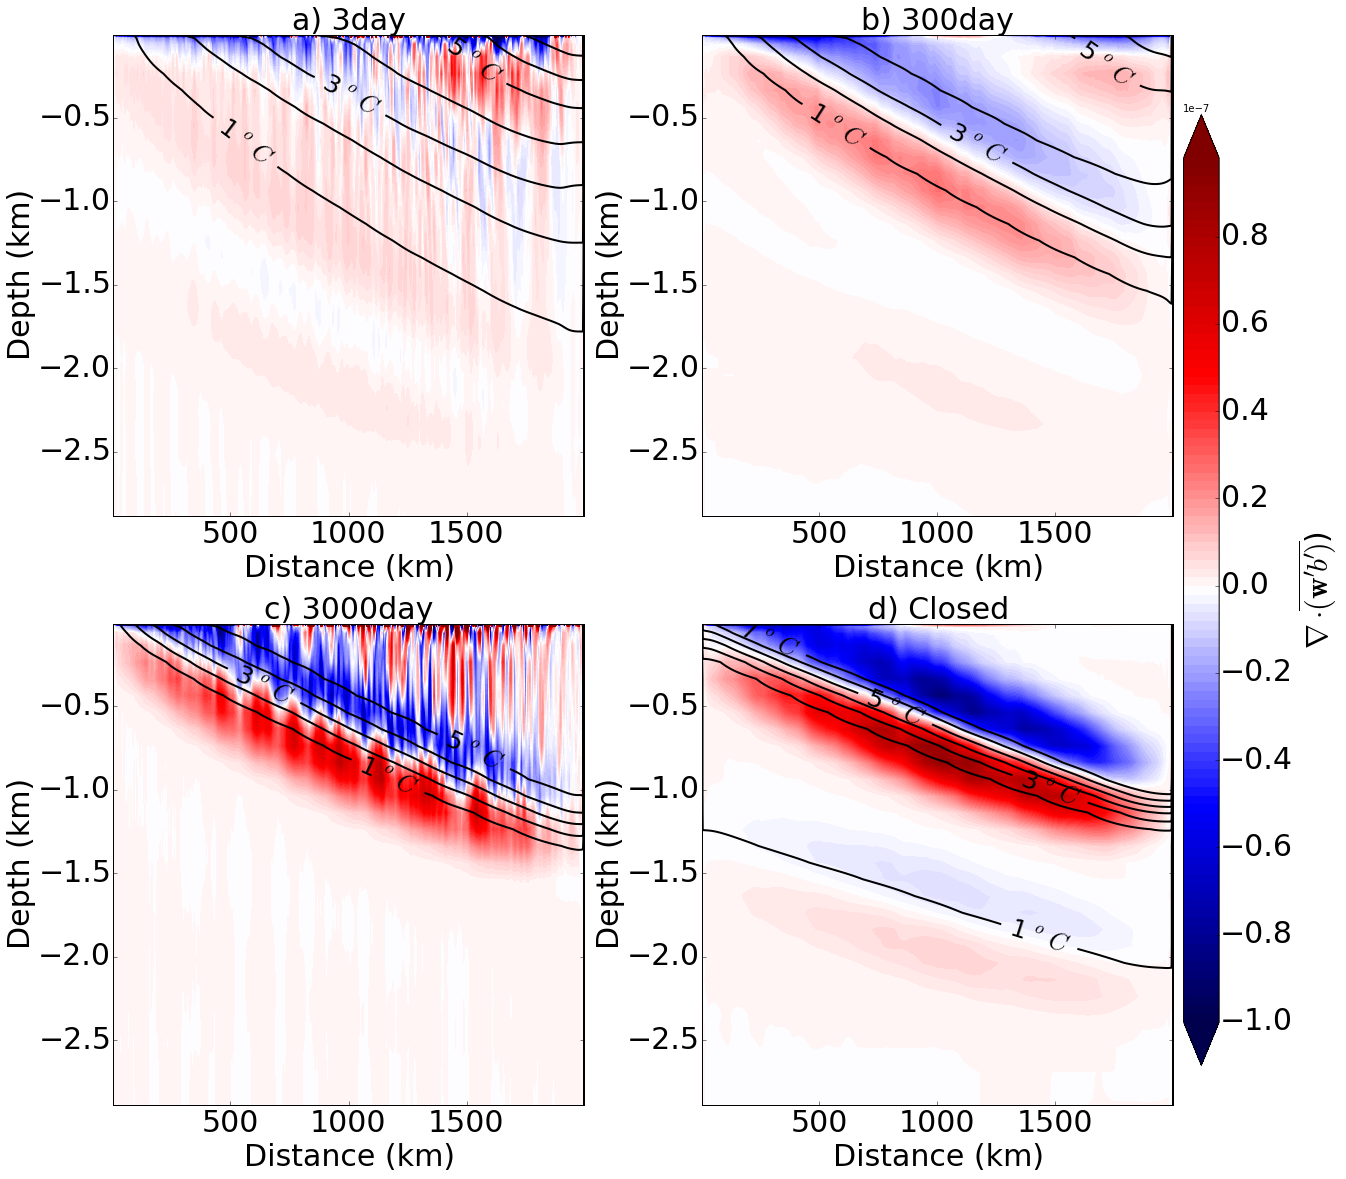

In [15]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddz_cgrid_centered(WpTp) ), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{w}' b')}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:41: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:41: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/Python/python_functions/MITgcmUtils/utils.py:213: RuntimeWarning: invalid value encountered in subtract
  out[:,1:Ny-1] = ma.divide((q[:,2::] - q[:,:Ny-2]) , (dyc[:,1:Ny-1] + dyc[:,3::]))
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:806: RuntimeWarning: invalid 

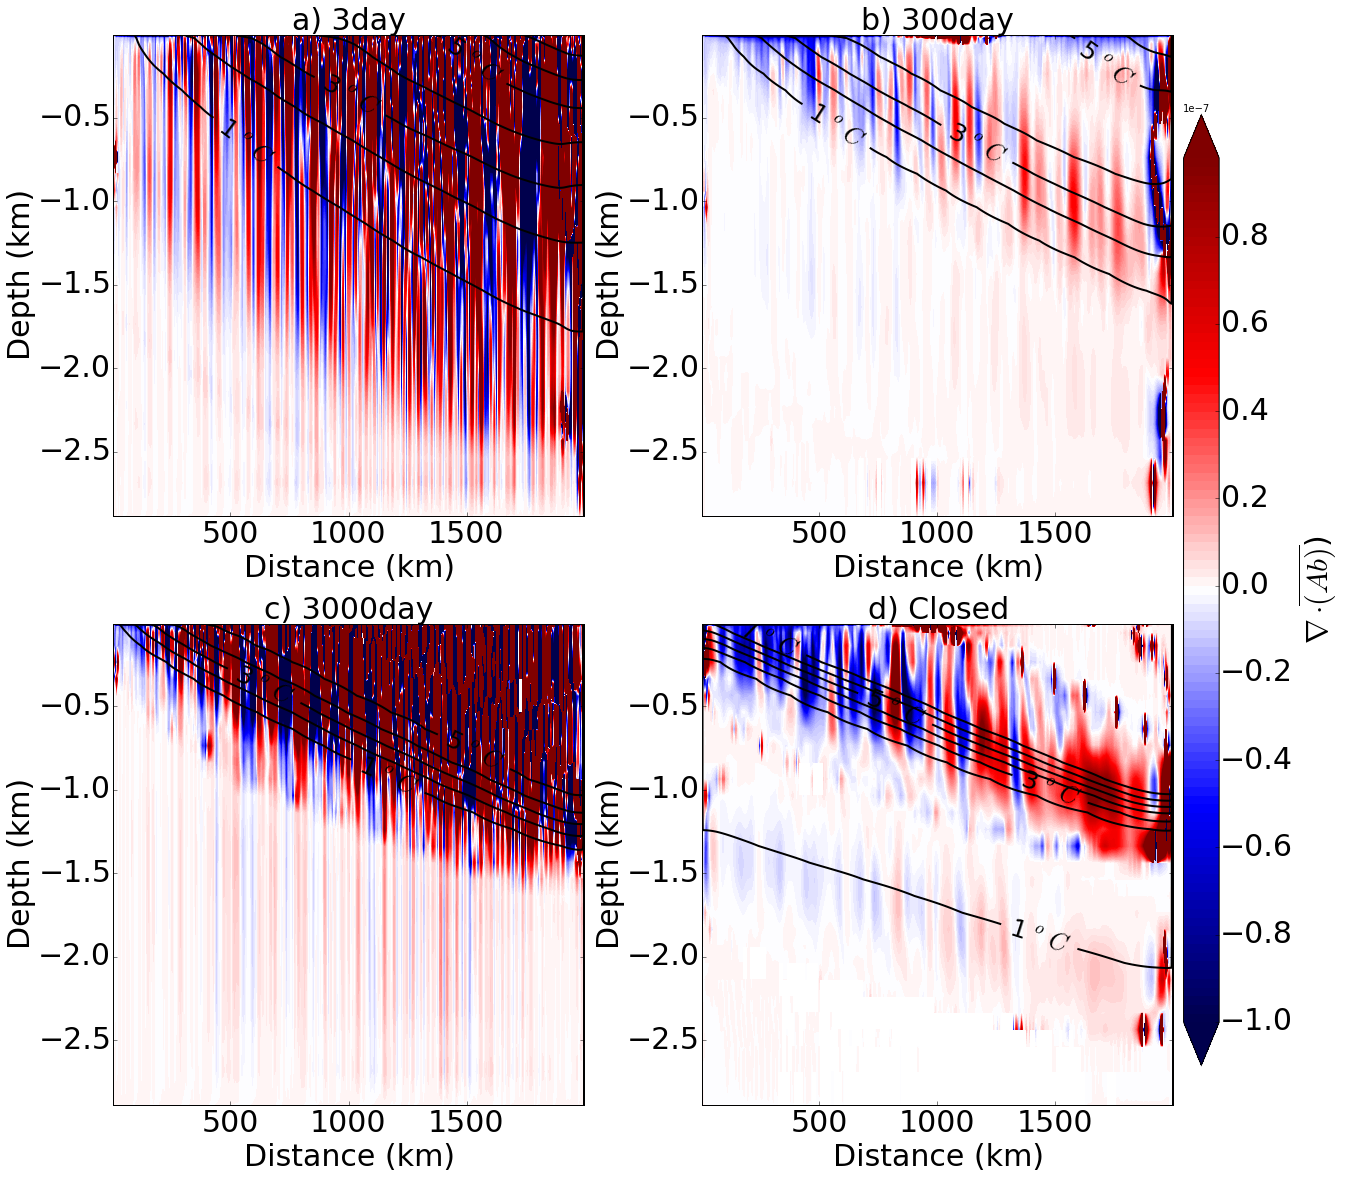

In [16]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000, c.ddz_cgrid_centered(WpTp) + c.ddy_cgrid_centered(WpTp/S) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(Ab)}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:41: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:41: RuntimeWarning: invalid value encountered in divide


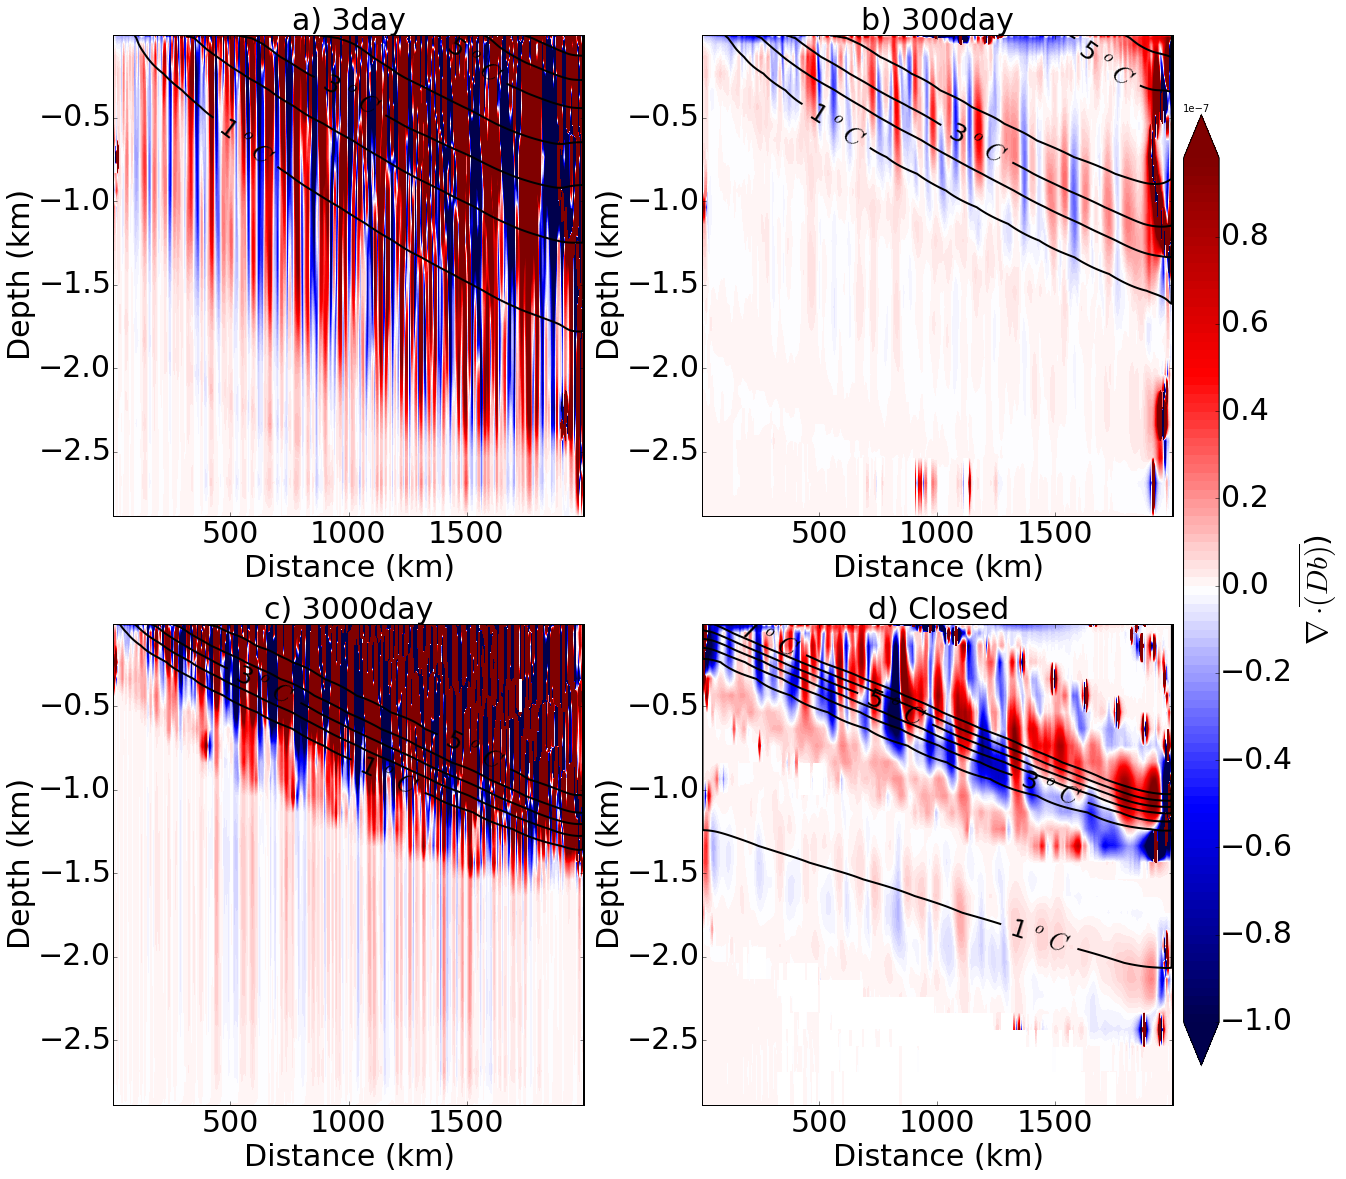

In [17]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddy_cgrid_centered(VpTp-WpTp/S) ), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(Db)}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

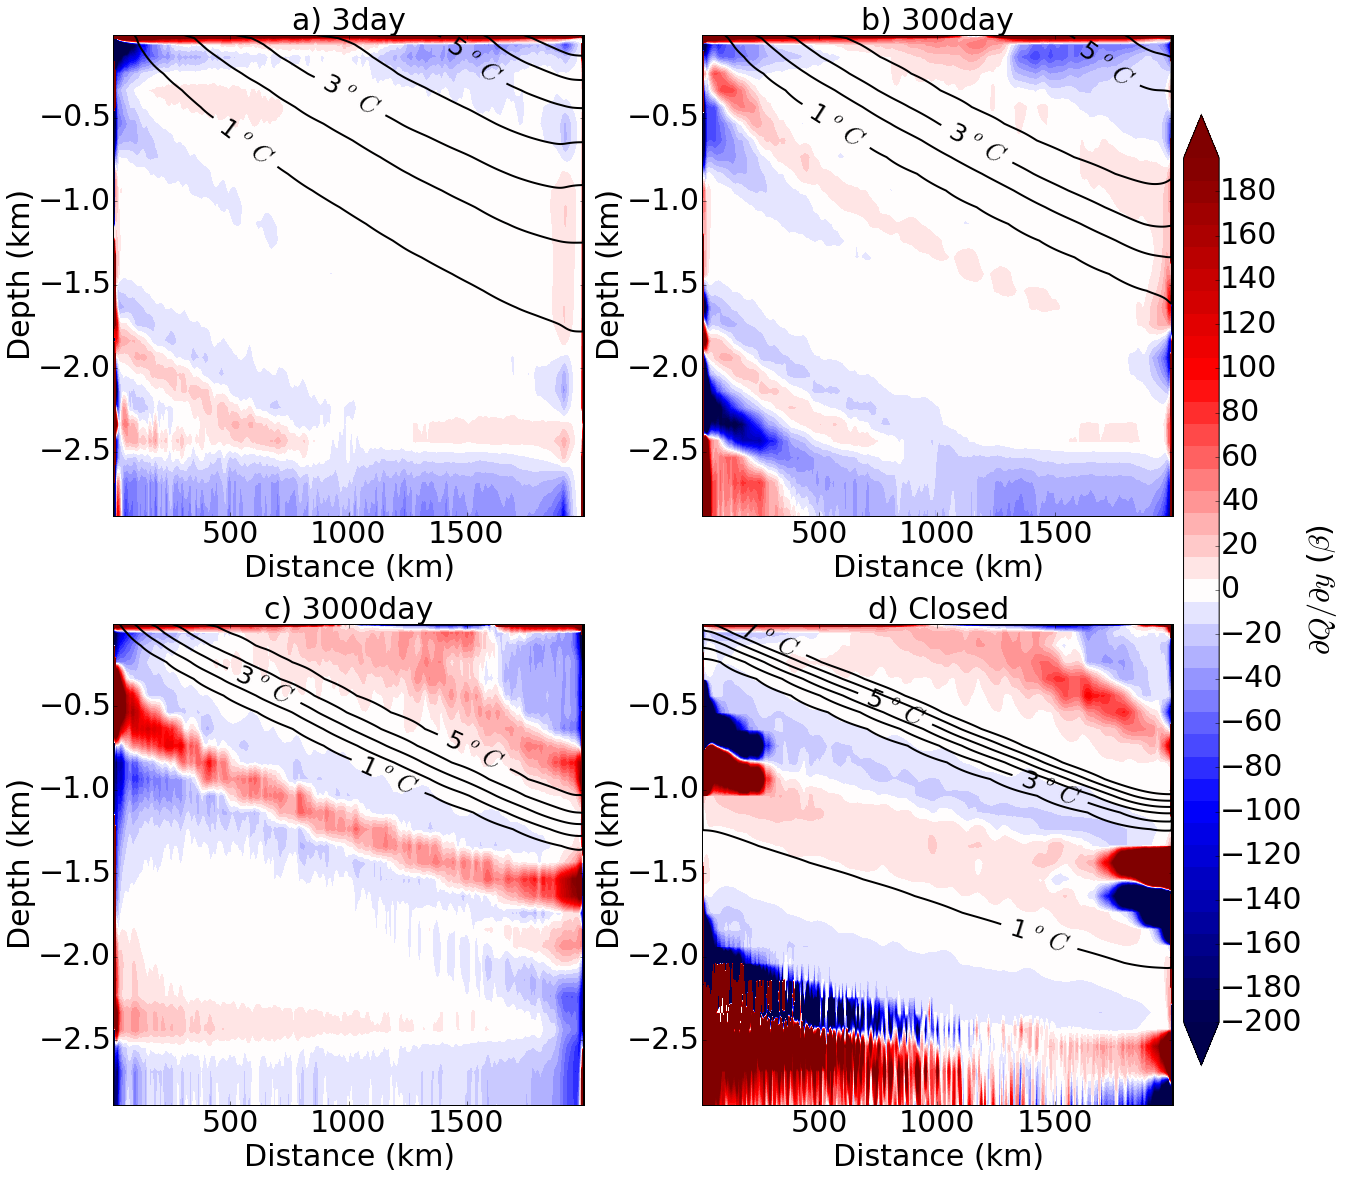

In [18]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-20,20)+0.5)
Q_ticks = np.arange(-20., 20., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    #title(r'$\partial Q / \partial y$ ($\beta$) - ', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                c.get_qgpv_grad()/c.beta, Q_levs*10, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Q_ticks*10)
cbar.ax.set_ylabel(r'$\partial Q / \partial y$ ($\beta$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

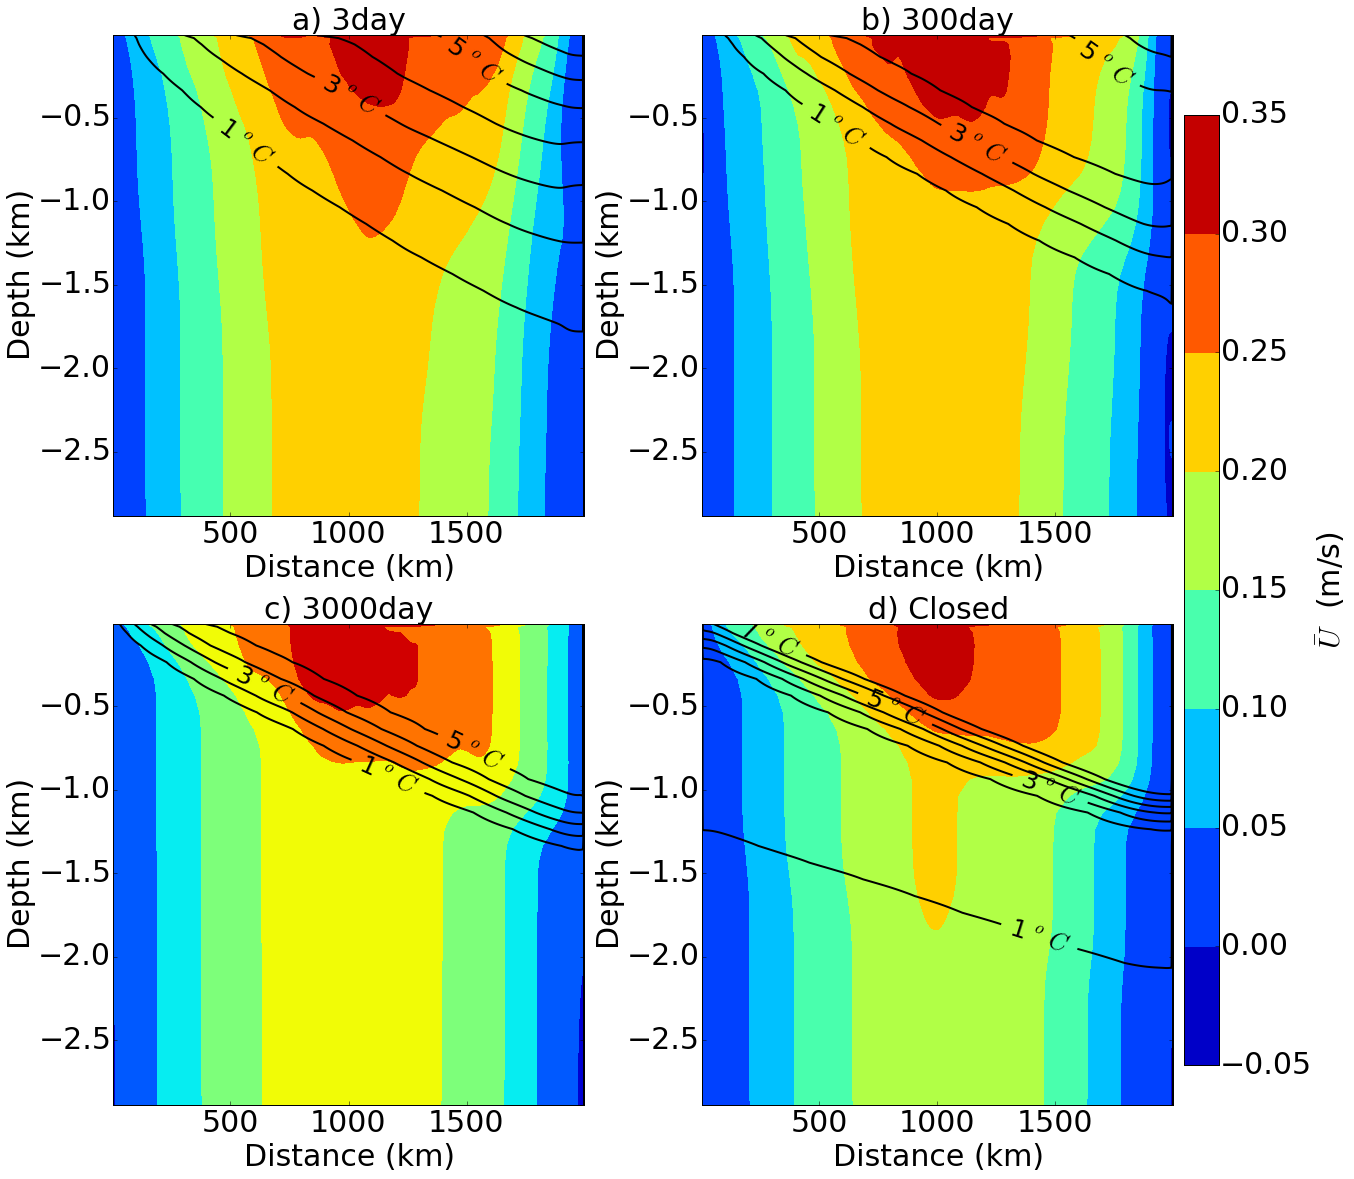

In [30]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.2, .355, .05)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2) 
    
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              Ubar, cmap=cm.jet)

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\bar U$  (m/s)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

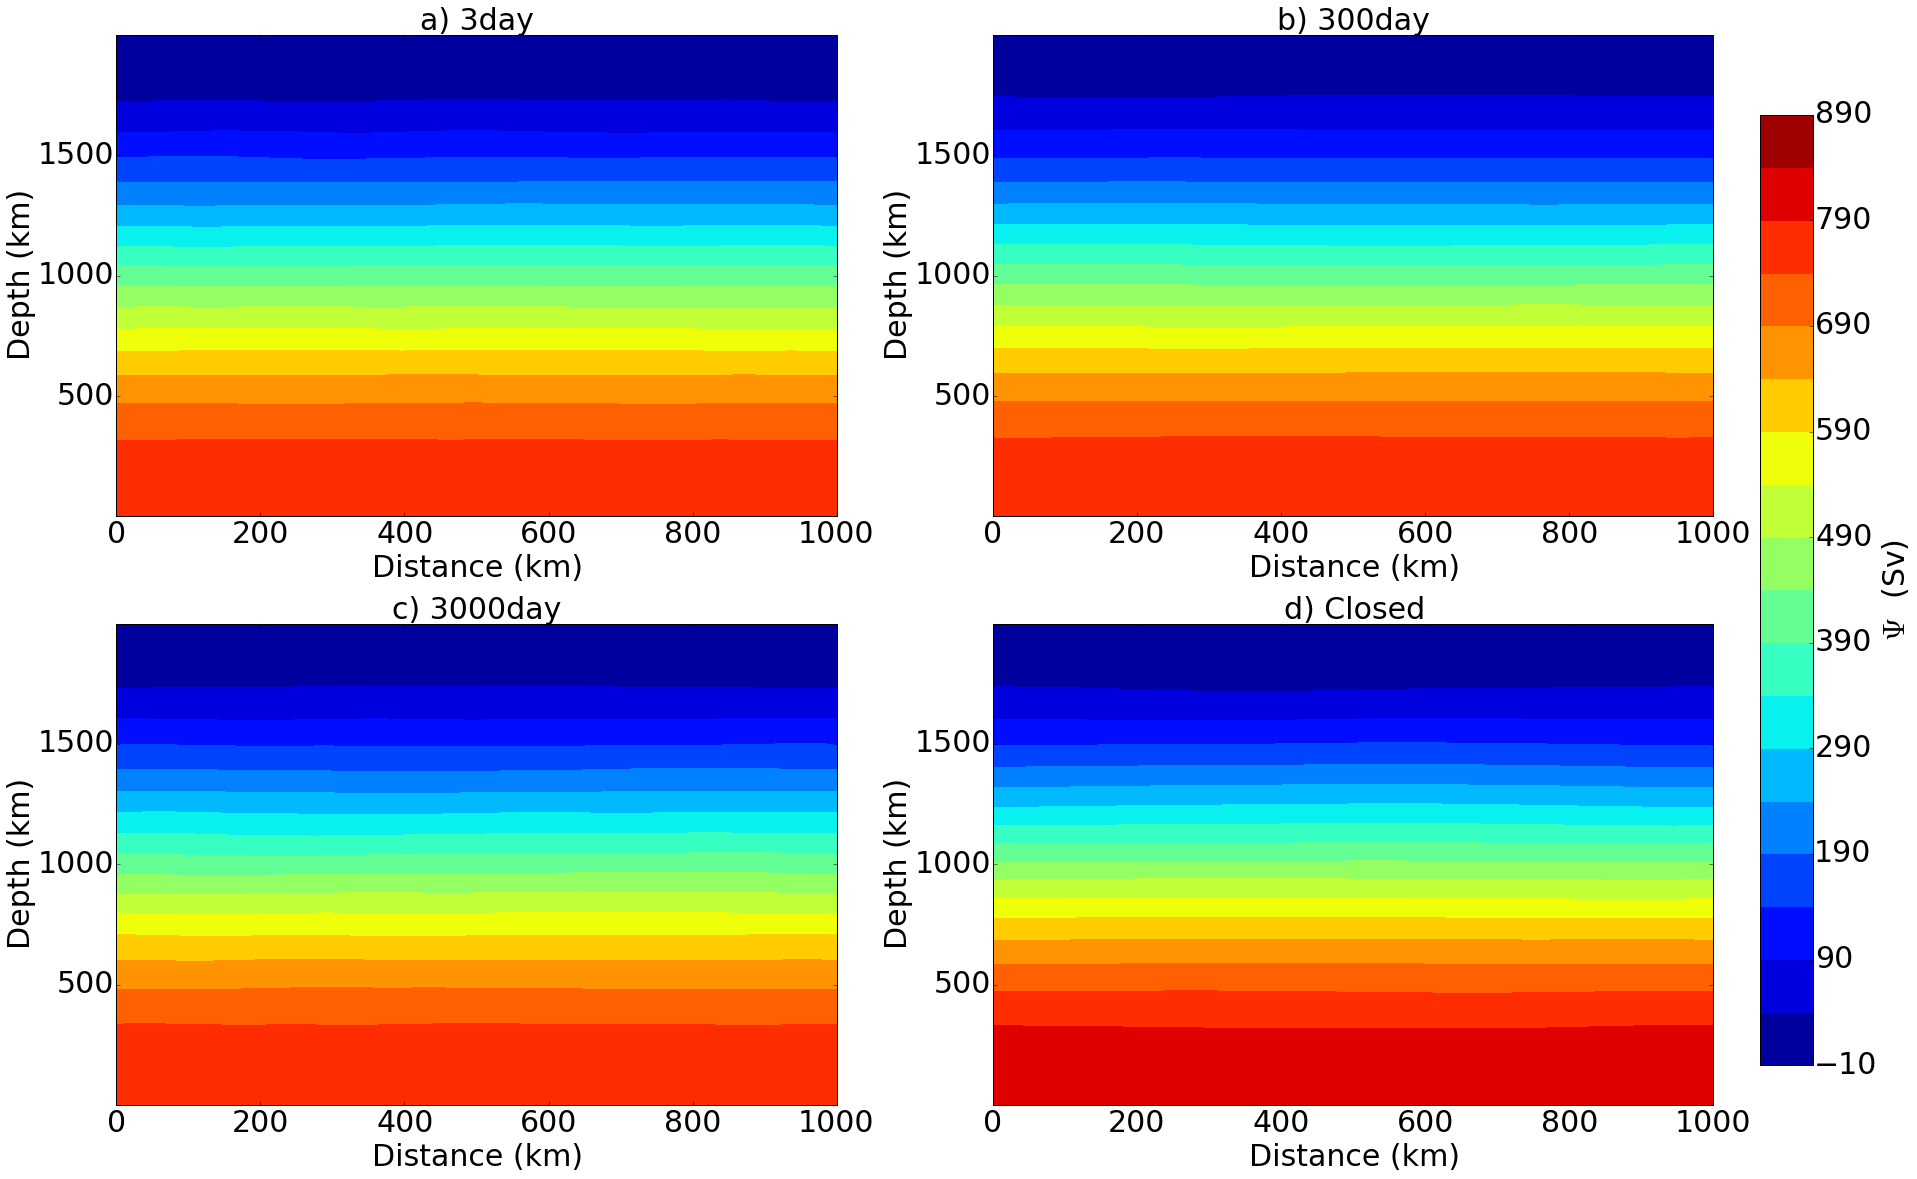

In [19]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-10, 900, 50)
Psi_ticks =np.arange(0., 1000., 100.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))

    
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xg/1000, c.yc/1000,
                np.cumsum(np.nansum(c.mnc('Tav.nc','UVEL')*tile(c.dzf,(c.Nx+1,c.Ny,1)).T,axis=0)[::-1,:]*5000,axis=0)[::-1,:]/10**6 , Psi_levs,cmap=cm.jet)

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)
